<a href="https://colab.research.google.com/github/LaprionCode/Cat-breed-YoloTrain/blob/main/YOLOv5_Train_CatBreed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔧 Train YOLOv5 on Custom Dataset in Google Colab

In [1]:
# Check GPU
!nvidia-smi

Tue Jun 24 01:11:13 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   34C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 📦 Clone YOLOv5 and Install Dependencies

In [2]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17496, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 17496 (delta 2), reused 0 (delta 0), pack-reused 17490 (from 3)
Receiving objects: 100% (17496/17496), 16.56 MiB | 22.76 MiB/s, done.
Resolving deltas: 100% (11997/11997), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:0

## 🔗 Mount Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## 📂 Unzip Dataset

In [4]:
import zipfile
import os

# Set path to your ZIP file in Drive (edit this if needed)
zip_path = '/content/drive/MyDrive/data.zip'
extract_dir = '/content/yolo_dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Check extracted files
os.listdir(extract_dir)


['test',
 'data.yaml',
 'valid',
 'train',
 'README.roboflow.txt',
 'README.dataset.txt']

## 🏋️ Train YOLOv5 Model

In [6]:
# Fix path inside data.yaml to point to correct folder
import yaml

yaml_path = "/content/yolo_dataset/data.yaml"

with open(yaml_path) as f:
    data = yaml.safe_load(f)

# Update paths relative to /content/yolov5
data['train'] = '../yolo_dataset/train/images'
data['val'] = '../yolo_dataset/valid/images'

with open(yaml_path, 'w') as f:
    yaml.dump(data, f)

print("✅ Updated data.yaml paths:")
print(data)


✅ Updated data.yaml paths:
{'train': '../yolo_dataset/train/images', 'val': '../yolo_dataset/valid/images', 'test': '../test/images', 'nc': 13, 'names': ['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British Shorthair', 'Egyptian_Mau', 'Havana', 'Maine Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx'], 'roboflow': {'workspace': 'laprion', 'project': 'cat-breeds-cbvra-zgsij', 'version': 1, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/laprion/cat-breeds-cbvra-zgsij/dataset/1'}}


In [7]:
# Go to YOLOv5 directory
%cd /content/yolov5

# Train
!python train.py --img 640 --batch 16 --epochs 50 --data /content/yolo_dataset/data.yaml --weights yolov5s.pt --name yolo_catbreed


Streaming output truncated to the last 5000 lines.
      30/49      4.93G     0.0222    0.01222    0.03921         51        640:  25% 30/121 [00:11<00:35,  2.58it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      30/49      4.93G    0.02225    0.01227    0.03913         52        640:  26% 31/121 [00:11<00:34,  2.63it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      30/49      4.93G    0.02228    0.01228    0.03872         47        640:  26% 32/121 [00:12<00:30,  2.95it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      30/49      4.93G    0.02223 

## 💾 Save Trained Model to Drive

In [11]:
from google.colab import files

# Copy to root for easier download
!cp /content/yolov5/runs/train/yolo_catbreed2/weights/best.pt /content/best_catbreed.pt

# Download
files.download('/content/best_catbreed.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
!python detect.py \
  --weights runs/train/yolo_catbreed2/weights/best.pt \
  --source /content/yolo_dataset/valid/images \
  --conf 0.25 \
  --save-txt \
  --save-conf \
  --name yolo_val_predict


detect: weights=['runs/train/yolo_catbreed2/weights/best.pt'], source=/content/yolo_dataset/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=yolo_val_predict, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
image 1/386 /content/yolo_dataset/valid/images/Abyssinian_82_jpg.rf.b1ee7ba0a8f51b97c1d2978ae26bb525.jpg: 640x480 1 Abyssinian, 28.8ms
image 2/386 /content/yolo_dataset/valid/images/Abyssinian_89_jpg.rf.e49c85fecfc4d000858cf083616c8ac3.jpg: 512x640 1 Abyssinian, 45.4ms
image 3

In [13]:
!python val.py \
  --weights runs/train/yolo_catbreed2/weights/best.pt \
  --data /content/yolo_dataset/data.yaml \
  --task val \
  --save-conf \
  --save-json \
  --save-hybrid \
  --name yolo_val_metrics


val: data=/content/yolo_dataset/data.yaml, weights=['runs/train/yolo_catbreed2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=True, save_conf=True, save_json=True, project=runs/val, name=yolo_val_metrics, exist_ok=False, half=False, dnn=False
WARNING ⚠️ --save-hybrid will return high mAP from hybrid labels, not from predictions alone
YOLOv5 🚀 v7.0-421-g79c4c31d Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
val: Scanning /content/yolo_dataset/valid/labels.cache... 386 images, 0 backgrounds, 0 corrupt: 100% 386/386 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 13/13 [00:07<00:00,  1.63it/s]
                   all        386        387          1          1      0.995      

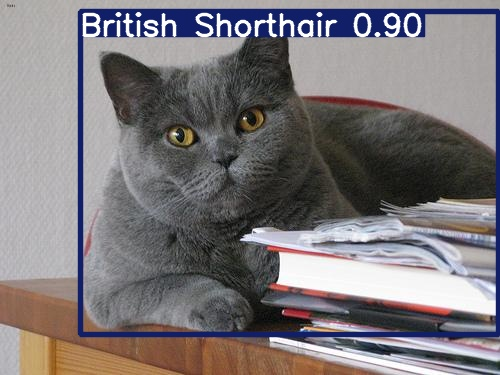

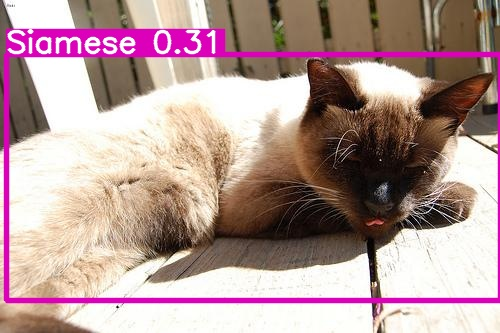

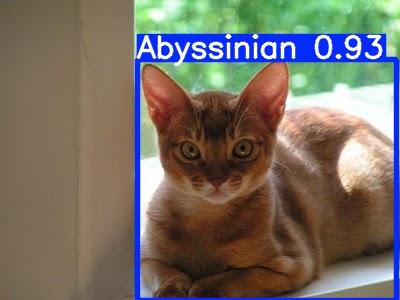

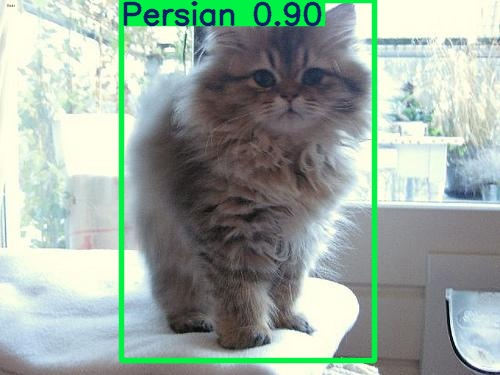

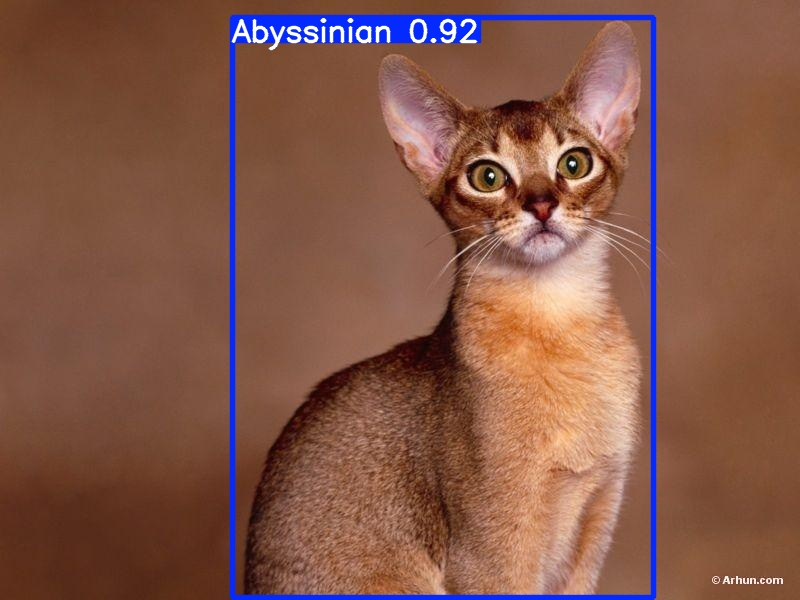

In [15]:
import os
from IPython.display import Image, display

result_dir = "runs/detect/yolo_val_predict"
images = os.listdir(result_dir)
sample_images = [img for img in images if img.endswith(('.jpg', '.png'))][:5]  # take 5

for img_name in sample_images:
    display(Image(filename=os.path.join(result_dir, img_name)))


In [16]:
# 📁 Create "my_model" folder to store model weights and training results
!mkdir -p /content/my_model

# ✅ Copy best weights and rename
!cp /content/yolov5/runs/train/yolo_catbreed2/weights/best.pt /content/my_model/my_model.pt

# ✅ Optionally include training results (metrics, graphs)
!cp -r /content/yolov5/runs/train/yolo_catbreed2 /content/my_model/train_results

# 📦 Zip into "my_model.zip"
%cd /content/my_model
!zip -r /content/my_model.zip .  # zip everything inside my_model
%cd /content

# 📥 Download the zip
from google.colab import files
files.download('/content/my_model.zip')


/content/my_model
  adding: my_model.pt (deflated 9%)
  adding: train_results/ (stored 0%)
  adding: train_results/R_curve.png (deflated 5%)
  adding: train_results/labels.jpg (deflated 29%)
  adding: train_results/train_batch2.jpg (deflated 5%)
  adding: train_results/val_batch0_labels.jpg (deflated 11%)
  adding: train_results/hyp.yaml (deflated 45%)
  adding: train_results/results.csv (deflated 82%)
  adding: train_results/results.png (deflated 8%)
  adding: train_results/events.out.tfevents.1750727816.2bbb11984a2f.3084.0 (deflated 20%)
  adding: train_results/val_batch2_labels.jpg (deflated 6%)
  adding: train_results/train_batch1.jpg (deflated 4%)
  adding: train_results/opt.yaml (deflated 50%)
  adding: train_results/train_batch0.jpg (deflated 5%)
  adding: train_results/val_batch2_pred.jpg (deflated 6%)
  adding: train_results/val_batch1_pred.jpg (deflated 6%)
  adding: train_results/P_curve.png (deflated 6%)
  adding: train_results/F1_curve.png (deflated 5%)
  adding: train_res

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>